# First Laboratory Exam - Set B

## Assignment Instructions

**Predicting Heart Disease Risk for a Community Health Clinic**


You have been hired by Dr. Mendoza, the lead physician at a community health clinic, to develop a predictive tool that determines whether a patient is at risk of heart disease. She provides you with a raw dataset containing various health metrics collected from adult patients, such as BMI, blood pressure, physical health indicators, and sleep habits. However, the dataset is not clean—some important values are missing or inconsistently recorded due to incomplete entries in the clinic’s database.



The clinic defines “at risk” patients as those likely to develop heart disease. Dr. Mendoza wants a simple web-based app that her nursing staff can use to:

- Input the clinical details of a patient,
- Get an instant prediction on whether the patient is at risk or not at risk,
- View a confidence score to support early medical decisions.


As the assigned developer, you are expected to:

- Analyze and prepare the dataset for modeling, considering the presence of missing and inconsistent records.
- Design a binary classification strategy based on the existing heart disease indicator.
- Explore and choose a suitable machine learning model to perform the prediction.
- Prepare the model and any necessary components for reuse.
- Create a web-based application where users can input patient information and receive a classification result with a confidence score.
- Deploy the application for public use.


**Submission Requirements**

- Submit the public URL of your deployed application.
- Submit the link of the Notebook used for data preparation, model training, and export.

## Import Commonly used library

In [25]:
import pandas as pd
import numpy as np


## Read csv file

In [26]:
df = pd.read_csv('heart_2020_uncleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,no,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,no,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,no,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


## Data Cleaning

### Checking missing values

In [27]:
print("Missing values before handling:")
print(df.isnull().sum())


Missing values before handling:
HeartDisease          0
BMI                 150
Smoking               0
AlcoholDrinking       0
Stroke                0
PhysicalHealth      120
MentalHealth          0
DiffWalking           0
Sex                   0
AgeCategory           0
Race                  0
Diabetic              0
PhysicalActivity      0
GenHealth             0
SleepTime           100
Asthma                0
KidneyDisease         0
SkinCancer            0
dtype: int64


### Filling in missing values with mean

In [28]:
# Fill missing numerical values with the mean
df['BMI'].fillna(df['BMI'].mean(), inplace=True)
df['PhysicalHealth'].fillna(df['PhysicalHealth'].mean(), inplace=True)
df['SleepTime'].fillna(df['SleepTime'].mean(), inplace=True)

print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values after handling:
HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_7192\3272298773.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BMI'].fillna(df['BMI'].mean(), inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_7192\3272298773.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [29]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,no,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,no,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,no,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


### Mapping Yes or No values with 1 or 0

In [30]:
binary_cols = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']

for col in binary_cols:
    df[col] = df[col].str.lower().str.strip()
    df[col] = df[col].replace({'yes': 1, 'no': 0})

df['Diabetic'] = df['Diabetic'].str.lower().str.strip()
df['Diabetic'] = df['Diabetic'].replace({
    'no': 0,
    'yes': 1,
    'yes (during pregnancy)': 1,
    'borderline diabetes': 1,
    'prediabetes': 1,
    'no, borderline diabetes': 0,
    'unknown': np.nan  # or 0 or drop
})

C:\Users\Admin\AppData\Local\Temp\ipykernel_7192\973672203.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'yes': 1, 'no': 0})
C:\Users\Admin\AppData\Local\Temp\ipykernel_7192\973672203.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Diabetic'] = df['Diabetic'].replace({


In [31]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,0,1,Very good,8.0,0,0,0


### Mapping Sex to 1 and 0

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  # Female = 0, Male = 1
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,White,0,1,Very good,8.0,0,0,0


### One-Hot encoding the Race column

In [33]:
df = pd.get_dummies(df, columns=['Race'], drop_first=True)
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,...,Very good,5.0,1,0,1,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,...,Very good,7.0,0,0,0,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,...,Fair,8.0,1,0,0,0,0,0,0,1
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,...,Good,6.0,0,0,1,0,0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,...,Very good,8.0,0,0,0,0,0,0,0,1


### Mapping GenHealth

In [34]:
health_order = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very good': 3,
    'Excellent': 4
}

df['GenHealth'] = df['GenHealth'].map(health_order)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,...,3,5.0,1,0,1,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,...,3,7.0,0,0,0,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,...,1,8.0,1,0,0,0,0,0,0,1
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,...,2,6.0,0,0,1,0,0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,...,3,8.0,0,0,0,0,0,0,0,1


### Mapping AgeCategory column

#### Checking the value counts of each range to compare to the mapped values later

In [35]:
df['AgeCategory'].value_counts().sort_index()

AgeCategory
18-24          21064
25-29          16955
30-34          18753
35-39          20550
40-44          21006
45-49          21791
50-54          25382
55-59          29757
60-64          33686
65-69          34151
70-74          31065
75-79          21482
80 or older    24153
Name: count, dtype: int64

#### Mapped AgeCategory

- the count matches with the unmapped AgeCategory, therefore this is correct mapping

In [36]:
age_order = {
    '18-24': 0,
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65-69': 9,
    '70-74': 10,
    '75-79': 11,
    '80 or older': 12
}

df['AgeCategory'] = df['AgeCategory'].map(age_order)
df['AgeCategory'].value_counts().sort_index()


AgeCategory
0     21064
1     16955
2     18753
3     20550
4     21006
5     21791
6     25382
7     29757
8     33686
9     34151
10    31065
11    21482
12    24153
Name: count, dtype: int64

In [37]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,0,16.60,1,0,0,3.0,30.0,0,0,7,...,3,5.0,1,0,1,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,...,3,7.0,0,0,0,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,1,9,...,1,8.0,1,0,0,0,0,0,0,1
3,0,24.21,0,0,0,0.0,0.0,0,0,11,...,2,6.0,0,0,1,0,0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,...,3,8.0,0,0,0,0,0,0,0,1


### Dropping duplicates

In [38]:
df = df.drop_duplicates()

### Checking for null values again to make sure

In [39]:
print(df.isnull().sum()) 

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
Race_Asian          0
Race_Black          0
Race_Hispanic       0
Race_Other          0
Race_White          0
dtype: int64


### Checking HearDisease count distribution

C:\Users\Admin\AppData\Local\Temp\ipykernel_7192\964371325.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='HeartDisease', palette='Set2')


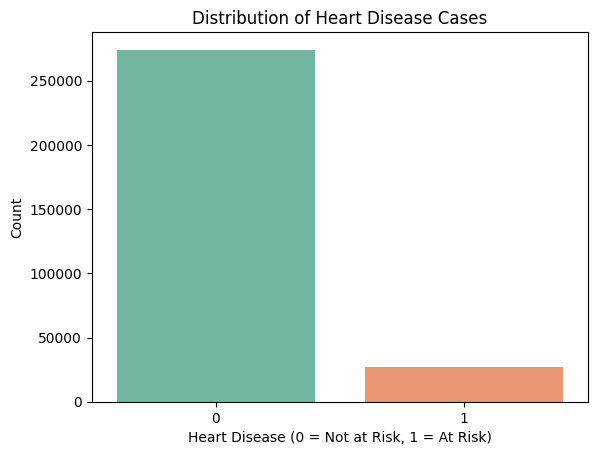

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='HeartDisease', palette='Set2')
plt.title('Distribution of Heart Disease Cases')
plt.xlabel('Heart Disease (0 = Not at Risk, 1 = At Risk)')
plt.ylabel('Count')
plt.show()

## Splitting Data

In [41]:
from sklearn.model_selection import train_test_split

X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## SMOTE resampling technique for equal distribution

In [42]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

## Random Forest Classifier Algorithm

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [44]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[49378  5572]
 [ 3759  1559]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.91     54950
           1       0.22      0.29      0.25      5318

    accuracy                           0.85     60268
   macro avg       0.57      0.60      0.58     60268
weighted avg       0.87      0.85      0.86     60268



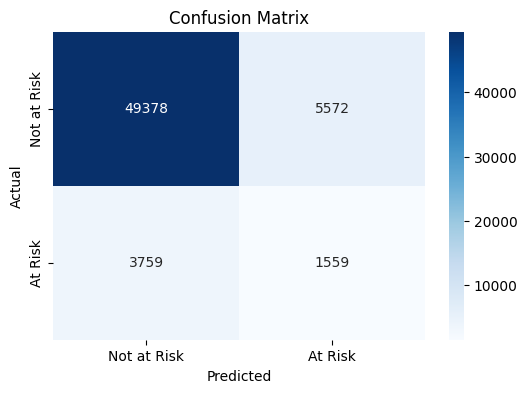

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Predict
y_pred = model.predict(X_test)

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not at Risk', 'At Risk'], yticklabels=['Not at Risk', 'At Risk'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Logistic Regression Algorithm

In [46]:
from sklearn.linear_model import LogisticRegression
logistics_model = LogisticRegression(class_weight='balanced', max_iter=1000)
logistics_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

              precision    recall  f1-score   support

           0       0.97      0.74      0.84     54950
           1       0.23      0.78      0.35      5318

    accuracy                           0.75     60268
   macro avg       0.60      0.76      0.60     60268
weighted avg       0.91      0.75      0.80     60268



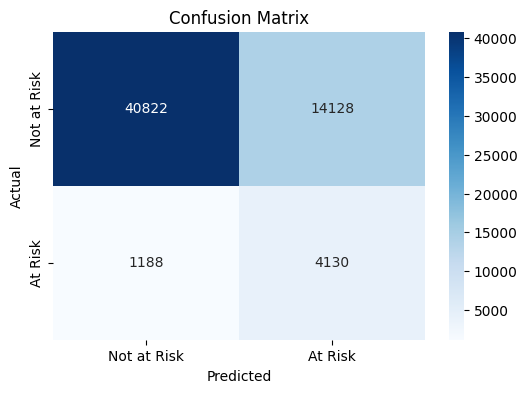

In [47]:
# Predict
y_pred = logistics_model.predict(X_test)

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
# Plot using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not at Risk', 'At Risk'], yticklabels=['Not at Risk', 'At Risk'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## XGBoost Algorithm

In [48]:
from xgboost import XGBClassifier

xg_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    # scale_pos_weight=5,     # Adjust based on imbalance (see tip below)
    random_state=42
)
xg_model.fit(X_resampled, y_resampled)

c:\Users\Admin\Documents\CODING\Python\machine-learning-labexam\venv\lib\site-packages\xgboost\training.py:183: UserWarning: [19:34:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

              precision    recall  f1-score   support

           0       0.94      0.85      0.89     54950
           1       0.23      0.47      0.31      5318

    accuracy                           0.82     60268
   macro avg       0.59      0.66      0.60     60268
weighted avg       0.88      0.82      0.84     60268



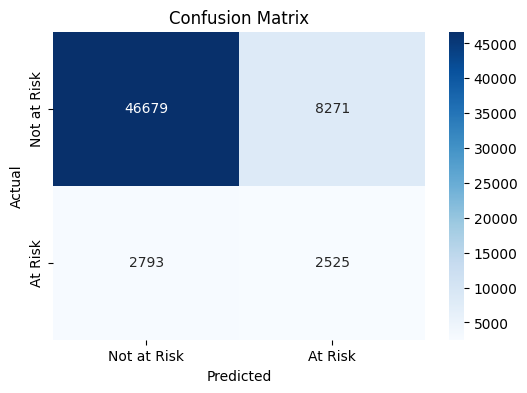

In [50]:
# Predict
y_pred = xg_model.predict(X_test)

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
# Plot using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not at Risk', 'At Risk'], yticklabels=['Not at Risk', 'At Risk'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [57]:
import joblib
import os

os.makedirs('models', exist_ok=True)

joblib.dump(model, 'models/heart_disease_model.joblib')


['models/heart_disease_model.joblib']

In [58]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  
df[df['HeartDisease'] == 1].head()


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
5,1,28.87,1,0,0,6.0,0.0,1,0,11,0,0,1,12.0,0,0,0,0,1,0,0,0
10,1,34.30,1,0,0,30.0,0.0,1,1,8,1,0,0,15.0,1,0,0,0,0,0,0,1
35,1,32.98,1,0,1,10.0,0.0,1,1,11,1,1,0,4.0,0,0,1,0,0,0,0,1
42,1,25.06,0,0,0,0.0,0.0,1,0,12,1,0,2,7.0,0,0,1,0,0,0,0,1
43,1,30.23,1,0,0,6.0,2.0,1,0,11,1,1,1,8.0,0,1,0,0,0,0,0,1
